In [28]:
import pandas as pd 
import numpy as np
import seaborn as sns
df = pd.read_csv("Salaries.csv")
df.columns#printing all the columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [29]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [30]:
df.dtypes #Printing the datatypes of all columns

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

We have 3 columns of int datatype and 2 columns of object datatype

In [31]:
df['salary'].nunique()

371

Since we have 371 unique values in target column hence it is a regression problem

In [32]:
df.loc[df['salary']==" "]#Checking if target column have space as values

,rank,discipline,yrs.since.phd,yrs.service,sex,salary


Dataset is not having any space value

In [33]:
df.isnull().sum()# Checking if coluumns have null values

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

Dataset is not having any null value

In [34]:
#Making dataframe nominal
df_visualization_nominal = df[['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary']].copy()

In [35]:
df.dtypes #Printing the datatypes of all columns

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


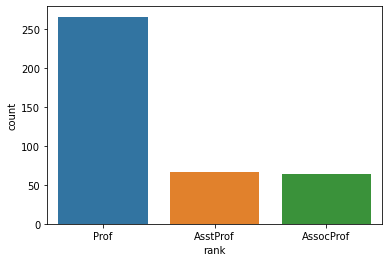

In [36]:
#
#Visualization of data
ax = sns.countplot(x="rank",data=df_visualization_nominal)
print(df_visualization_nominal["rank"].value_counts())

B    216
A    181
Name: discipline, dtype: int64


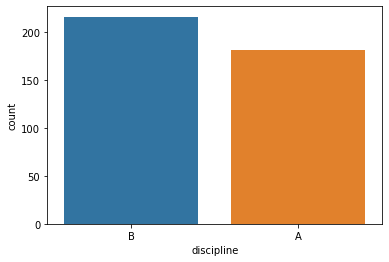

In [37]:
#
ax = sns.countplot(x="discipline",data=df_visualization_nominal)
print(df_visualization_nominal["discipline"].value_counts())

Male      358
Female     39
Name: sex, dtype: int64


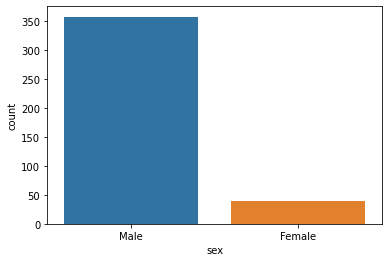

In [39]:
#
ax = sns.countplot(x='sex',data=df_visualization_nominal)
print(df_visualization_nominal['sex'].value_counts())

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

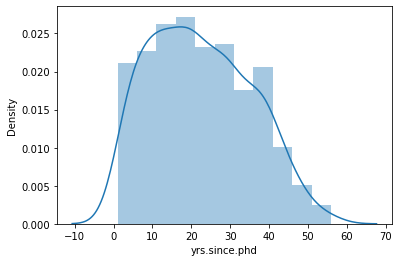

In [40]:
#Checking the distribution of float and int type columns
df_visualization_continous =df[["yrs.since.phd","yrs.service","salary"]].copy()
sns.distplot(df_visualization_continous['yrs.since.phd'],kde =True)

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

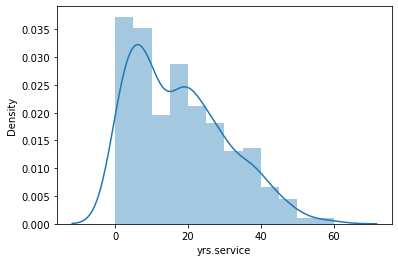

In [41]:
sns.distplot(df_visualization_continous['yrs.service'],kde =True)

<AxesSubplot:xlabel='salary', ylabel='Density'>

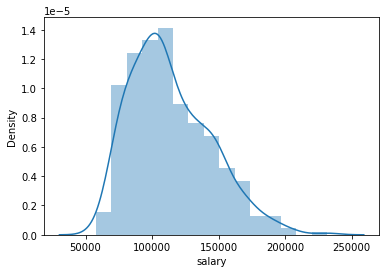

In [42]:
sns.distplot(df_visualization_continous['salary'],kde =True)

In [43]:
#Since we have data of rest of columns as object we will use encoding techniques to convert it into numeric data
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


By comparing the mean and median value of each of int and flot columns we fing there is no skewness present

<AxesSubplot:>

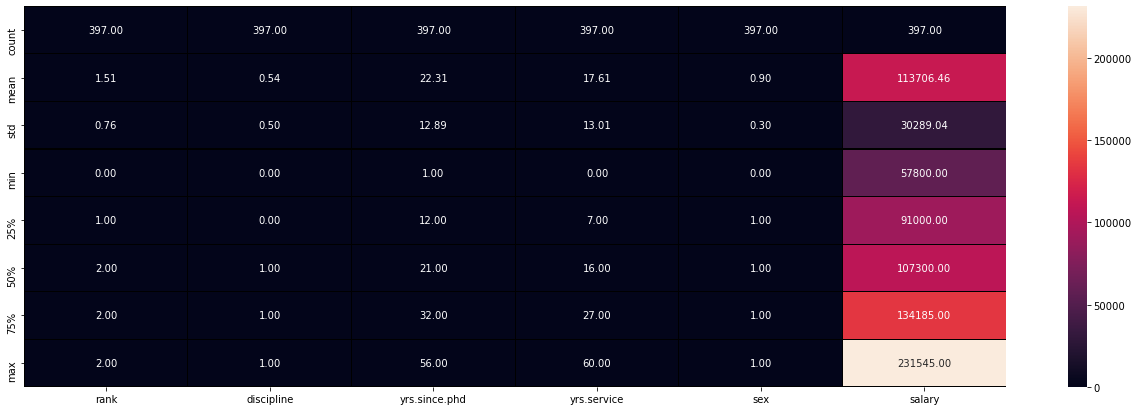

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize =(22,7))
sns.heatmap(df.describe(),annot =True,linewidths = 0.1, linecolor ="black", fmt = "0.2f")

In [45]:
#Checking coorelation of all columns with the target column
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

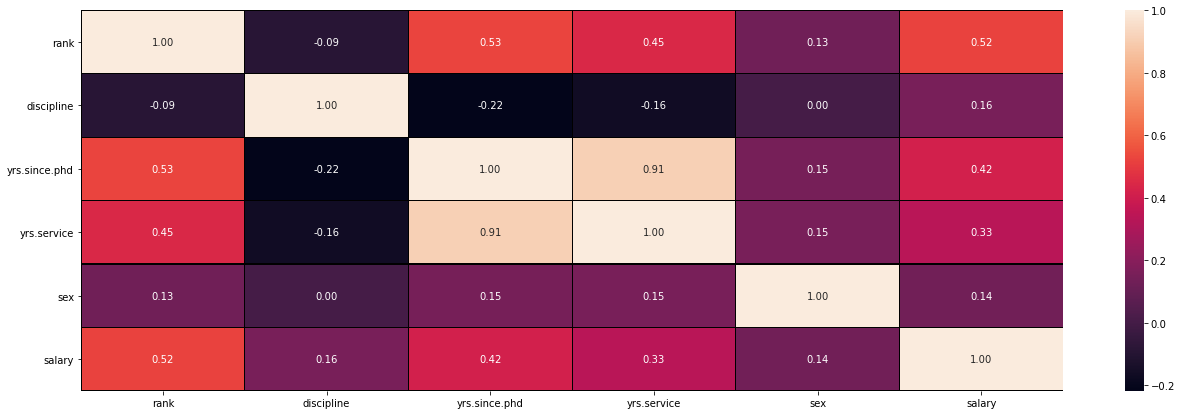

In [46]:
#drawing correlation heatmap
plt.figure(figsize =(22,7))
sns.heatmap(df.corr(),annot =True,linewidths = 0.1, linecolor ="black", fmt = "0.2f")

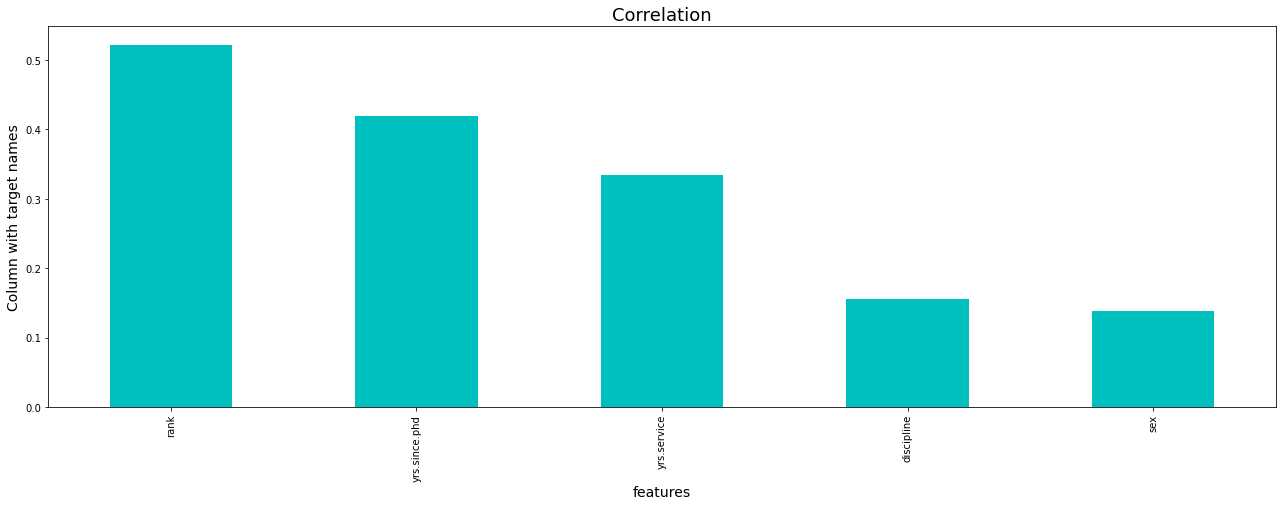

In [47]:
#Checking the correlation (+ve and -ve) with the target column in bar graph
plt.figure(figsize =(22,7))
df.corr()['salary'].sort_values(ascending = False).drop(['salary']).plot(kind= 'bar',color = "c")
plt.xlabel("features", fontsize = 14)
plt.ylabel("Column with target names", fontsize = 14)
plt.title("Correlation", fontsize =18)
plt.show()

In [48]:
#Checking skewness
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

Taking +/-0.5 as the allowed range for skewness so below are the columns which donot lie in this range 
- rank
- yrs.service
- sex
- salary


Since all the above columns except yrs.service are either categorical or Target hence we will only remove skewness from yrs.service column

<AxesSubplot:>

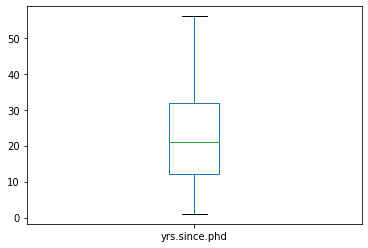

In [49]:
#Checking outliers for int and flot type columns (initially)
df["yrs.since.phd"].plot.box()

No outliers in yrs.since.phd

<AxesSubplot:>

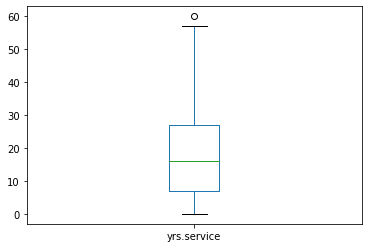

In [50]:
df["yrs.service"].plot.box()

No outliers in yrs.service

<AxesSubplot:>

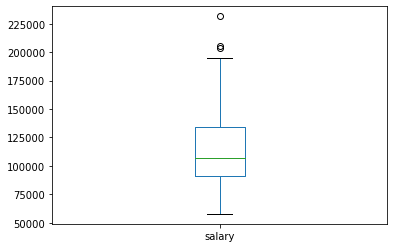

In [54]:
df["salary"].plot.box()

We will not reove outliers as "salary " is target

In [55]:
#Checking outlier data
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(df))
threshhold = 3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364]),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5]))

In [58]:
#removing outliers and checking data loss
df_new_z = df[(z<3).all(axis=1)]
#df_new_z.shape
#percentage loss
data_loss = ((7043-6361)/7043)*100
data_loss

9.683373562402386

In [59]:
#Seperating input and output as features and target
features = df_new_z.drop("salary",axis =1)
target = df_new_z["salary"]

In [60]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
mms = MinMaxScaler()
lr = LinearRegression()
warnings.filterwarnings("ignore")
for i in range(0,100):
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.2,random_state =i)
    lr.fit(features_train,target_train)
    pred_train = lr.predict(features_train)
    pred_test = lr.predict(features_test)
    print(f"at random state {i}, the train accuracy is: {r2_score(target_train,pred_train)}")
    print(f"at random state {i}, the test accuracy is: {r2_score(target_test,pred_test)}")
    print("\n")

at random state 0, the train accuracy is: 0.34580725676637414
at random state 0, the test accuracy is: 0.34217255754527753


at random state 1, the train accuracy is: 0.3177281294109646
at random state 1, the test accuracy is: 0.4167670143137434


at random state 2, the train accuracy is: 0.3489855563877067
at random state 2, the test accuracy is: 0.34872682277049494


at random state 3, the train accuracy is: 0.3377849738773925
at random state 3, the test accuracy is: 0.39167515905108974


at random state 4, the train accuracy is: 0.31709990965379276
at random state 4, the test accuracy is: 0.4240683627635452


at random state 5, the train accuracy is: 0.33392951900456636
at random state 5, the test accuracy is: 0.4141058387669241


at random state 6, the train accuracy is: 0.3329973194212317
at random state 6, the test accuracy is: 0.36894100539819885


at random state 7, the train accuracy is: 0.35604831349084975
at random state 7, the test accuracy is: 0.30578905607485785


at rand

In [99]:
#we are selecting random state as 80 because at i=80 we are getting highest test accuracy
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.2,random_state =80)
#training the model
lr.fit(features_train,target_train)
#Predicting values
pred_test = lr.predict(features_test)
print(r2_score(target_test,pred_test))

0.5086207408821504


In [100]:
#Cross validation of model
Training_accuracy = r2_score(target_train,pred_train)
Test_accuracy = r2_score(target_test,pred_test)
from sklearn.model_selection import cross_val_score
#Checking at what random state we have highest cross validation score and test accuracy
for j in range(2,10):
    cv_score = cross_val_score(lr,features,target,cv=j)#cv = j means my data will be divided into j equal parts
    cv_mean= cv_score.mean()
    print(f"At cross fold {j} the cv score is: {cv_mean} and accuracy score for training is: {Training_accuracy} and accuracy for testing is: {Test_accuracy}")
    print("\n")      

At cross fold 2 the cv score is: 0.3270801167406512 and accuracy score for training is: -0.4221638641130263 and accuracy for testing is: 0.5086207408821504


At cross fold 3 the cv score is: 0.3203328673059879 and accuracy score for training is: -0.4221638641130263 and accuracy for testing is: 0.5086207408821504


At cross fold 4 the cv score is: 0.3218196693768362 and accuracy score for training is: -0.4221638641130263 and accuracy for testing is: 0.5086207408821504


At cross fold 5 the cv score is: 0.29569928663871775 and accuracy score for training is: -0.4221638641130263 and accuracy for testing is: 0.5086207408821504


At cross fold 6 the cv score is: 0.33096341839295546 and accuracy score for training is: -0.4221638641130263 and accuracy for testing is: 0.5086207408821504


At cross fold 7 the cv score is: 0.3257704419996536 and accuracy score for training is: -0.4221638641130263 and accuracy for testing is: 0.5086207408821504


At cross fold 8 the cv score is: 0.331006058451358

Since we have highest cv score in cross fold 8 So we will select j=8 (as no impact of j on test score )

In [101]:
cv_score = cross_val_score(lr,features,target,cv=8)#cv = j means my data will be divided into j equal parts
cv_mean= cv_score.mean()

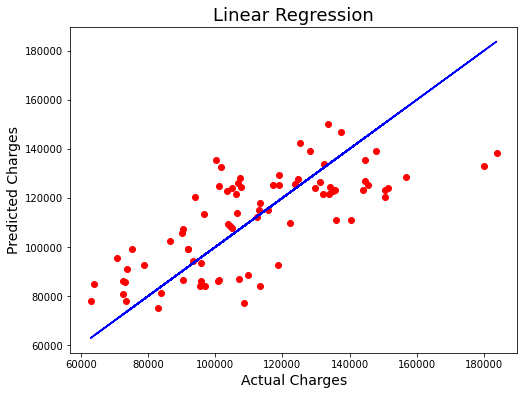

In [102]:
#drawing scatterplot to confirm the best fit line
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.scatter(x= target_test,y=pred_test,color = "r")
plt.plot(target_test,target_test, color = "b")
plt.xlabel("Actual Charges",fontsize = 14)
plt.ylabel("Predicted Charges", fontsize = 14)
plt.title("Linear Regression", fontsize = 18)
plt.savefig("lr.png")
plt.show()

best fit line is covering most of the datapoints which shows good fit of our model

In [103]:
#regularization to remove overfitting and underfitting
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Lasso
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls =Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [104]:
#training as per best params
ls =Lasso(alpha =10, random_state = 0)
ls.fit(features_train,target_train)
ls_score_training=ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)
ls_score_training*100

34.89156872247868

In [105]:
#getting ls score
lss = r2_score(target_test,pred_ls)
lss*100

50.84240592815815

In [106]:
#getting cv score
cv_score = cross_val_score(ls,features,target,cv=5)
cv_mean = cv_score.mean()
cv_mean*100

29.575407060855934

In [107]:
#Ensembling
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Lasso
parameters = {'criterion':['mse','mse'],'max_features':["auto","sqrt","log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)
#training as per best params
rf =RandomForestRegressor(criterion ="mae", max_features = "auto")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision = rf.predict(features_test)
#getting ls score
rfs= r2_score(target_test,pred_ls)
rfs*100
#getting cv score
rf_score = cross_val_score(rf,features,target,cv=5)
rf_mean = cv_score.mean()
rf_mean*100

{'criterion': 'mse', 'max_features': 'log2'}


29.575407060855934

In [108]:
#Saving and loading the model
import pickle
file_name = "churn.pkl"
pickle.dump(rf,open(file_name,"wb"))
#loading model
loaded_model = pickle.load(open("churn.pkl","rb"))
result = loaded_model.score(features_test,target_test)
print(result*100)
conclusion =pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index = ["Predicted","Original"])
conclusion

35.90631897905322


,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
Predicted,145544.49,126905.42,109673.215,103131.14,125094.65,108367.355,110704.81,73842.52,81856.5,97168.915,...,87874.475,142391.315,115730.76,85972.985,114027.48,181718.01,146019.455,83713.88,99219.88,108178.35
Original,145544.49,126905.42,109673.215,103131.14,125094.65,108367.355,110704.81,73842.52,81856.5,97168.915,...,87874.475,142391.315,115730.76,85972.985,114027.48,181718.01,146019.455,83713.88,99219.88,108178.35
